# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics 
from sklearn import linear_model
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
import xgboost

# Importing the dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vYxSqpgXYTE_5CsKrkuRv_pcMjpYBNBmaEy4lu9rgw03',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'exploratoryanalysisofrainfalldata-donotdelete-pr-nsxjcdoqodn5wl'
object_key = 'weatherAUS.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Analyze the data

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.shape

(145460, 23)

In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [9]:
#target count

data.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

# Visualization

In [10]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [11]:
plotPerColumnDistribution(data, 10, 5)

ValueError: Number of rows must be a positive integer, not 2.8

<Figure size 2400x1792 with 0 Axes>

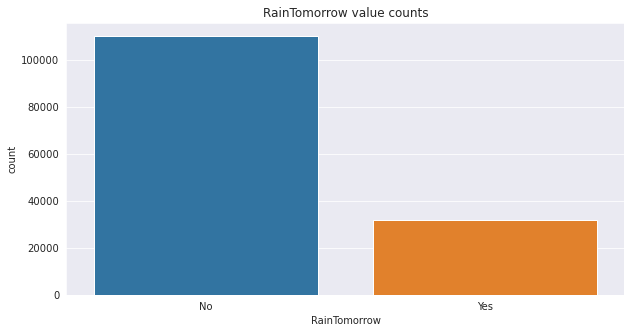

In [12]:
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
plt.title('RainTomorrow value counts')
sns.countplot(x=data["RainTomorrow"]);

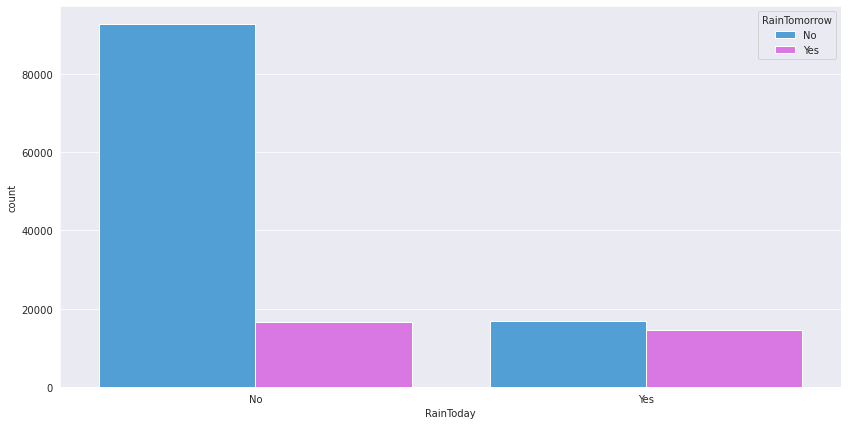

In [13]:
plt.figure(figsize=(14,7))
sns.countplot(x=data["RainToday"], hue=data["RainTomorrow"], palette=sns.color_palette("husl")[4:]);

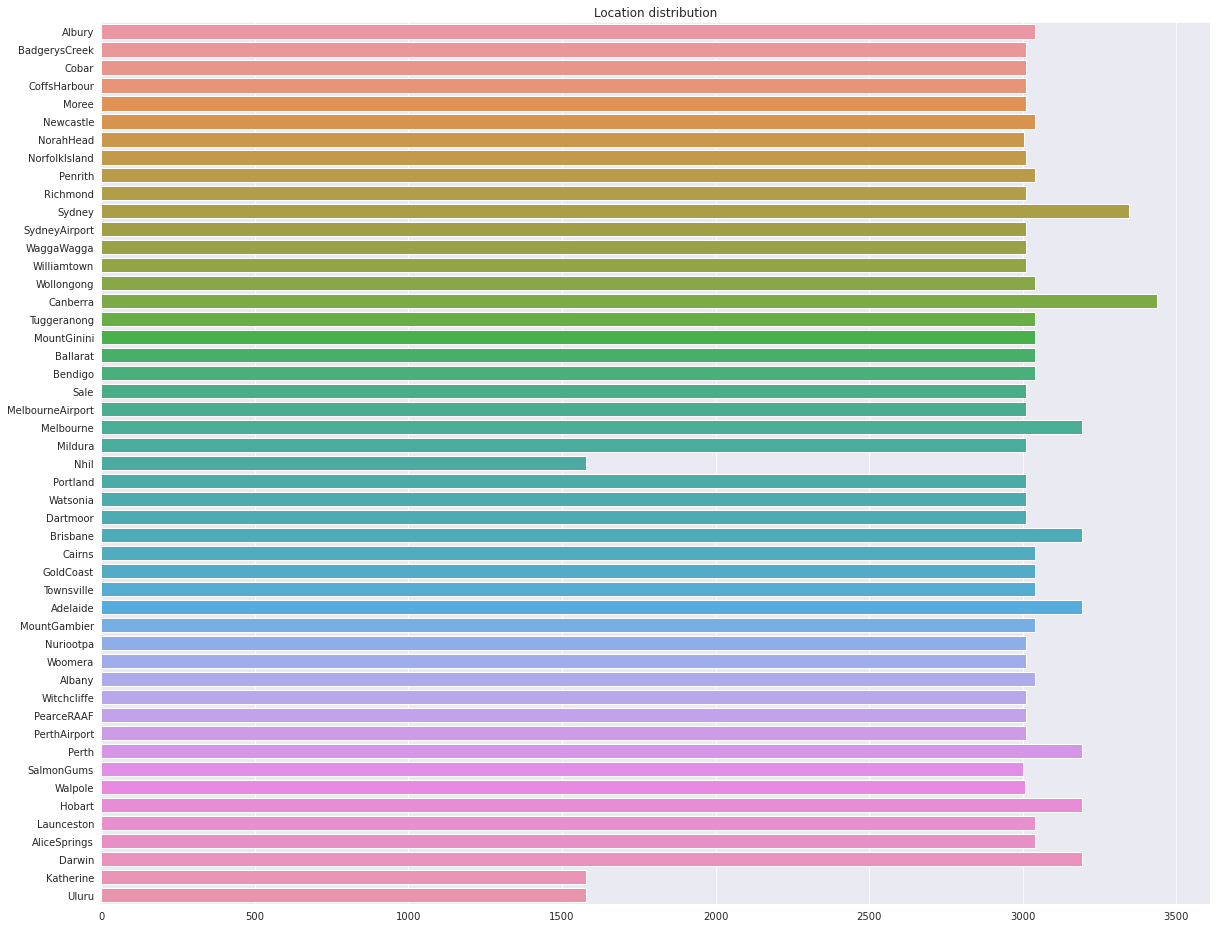

In [14]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location')

plt.title('Location distribution')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

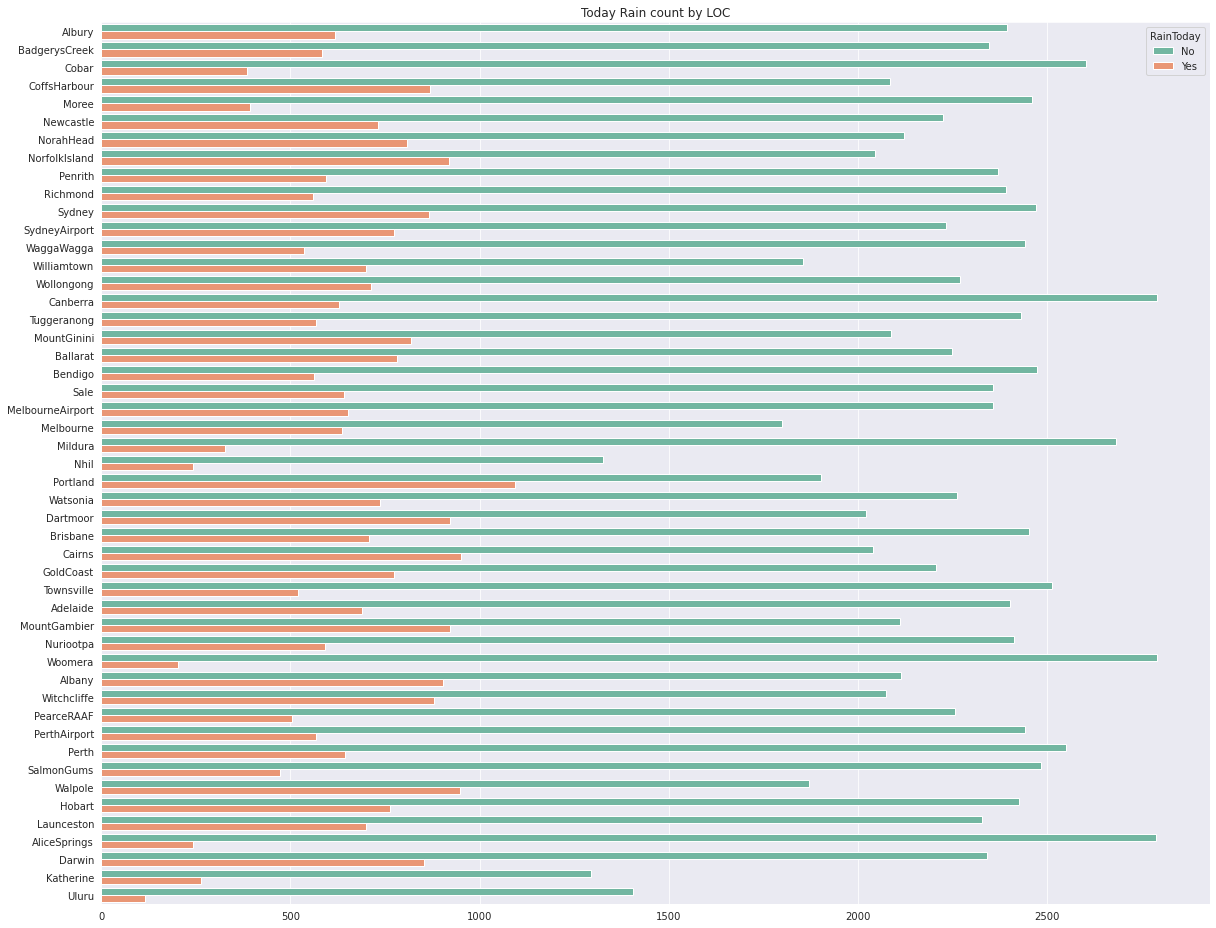

In [15]:
plt.figure(figsize=(17,13))
sns.countplot(data=data, y='Location', hue="RainToday", palette=sns.color_palette("Set2"))

plt.title('Today Rain count by LOC')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

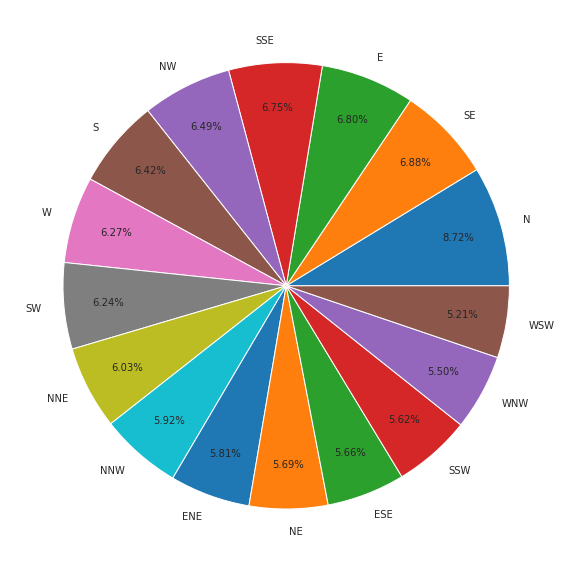

In [16]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir9am"].value_counts(),
        labels=list(data["WindDir9am"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

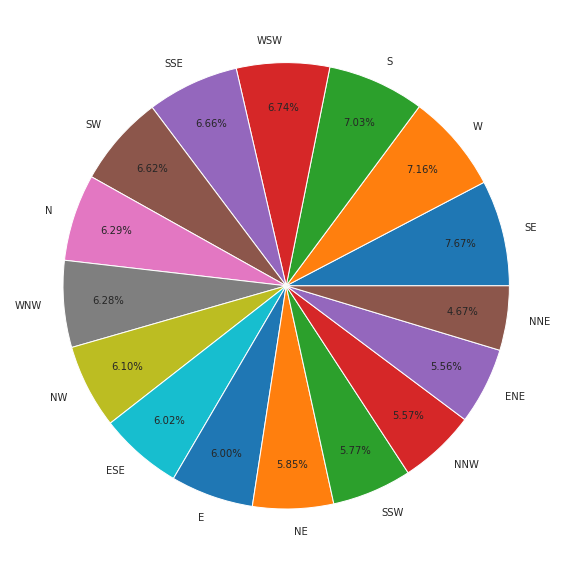

In [17]:
plt.figure(figsize=(10,11))
plt.pie(data["WindDir3pm"].value_counts(),
        labels=list(data["WindDir3pm"].value_counts().index),
        autopct='%1.2f%%',
        pctdistance=0.8,
       );

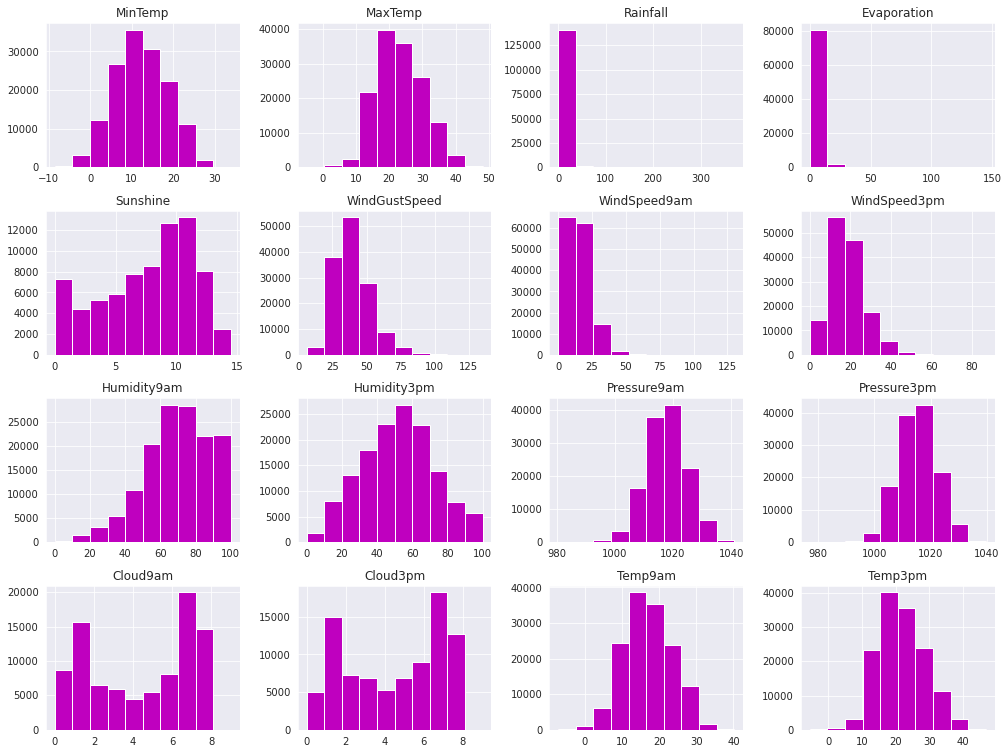

In [18]:
data.hist(figsize=(17,13), color="m");

# Preprocessing

In [19]:
df_preprocessed = data.copy()

In [20]:
df_preprocessed.isnull().mean() * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [21]:
mean = df_preprocessed.mean()
df_preprocessed.fillna(mean, inplace=True)

df_preprocessed.isna().sum()

/tmp/wsuser/ipykernel_164/2563157355.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_preprocessed.mean()


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [22]:
df_preprocessed.replace(np.nan, 'NaN', inplace=True)
df_preprocessed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [23]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [24]:
df_preprocessed['Date'] = pd.to_datetime(df_preprocessed['Date'])

In [25]:
#columns segregation
date_columns = ['Date']
cat_columns = df_preprocessed.select_dtypes(include=['object']).columns
num_columns = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns
target_col = 'RainTomorrow'

Encoding categorical variables

In [26]:
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [27]:
cat_columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

In [28]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [29]:
data_cat = data[['Location','RainToday','WindGustDir','WindDir9am','WindDir3pm','RainTomorrow']]

In [30]:
#Fitting and Transforming the missing data
data_cat = imp_mode.fit_transform(data_cat)

In [31]:
for i in cat_columns:
    print('Unique Values in ' + i + ' Column:', end = " ")
    print(len(df_preprocessed[i].unique()))
    print('-----------------------------------------------------')

Unique Values in Location Column: 49
-----------------------------------------------------
Unique Values in WindGustDir Column: 17
-----------------------------------------------------
Unique Values in WindDir9am Column: 17
-----------------------------------------------------
Unique Values in WindDir3pm Column: 17
-----------------------------------------------------
Unique Values in RainToday Column: 3
-----------------------------------------------------
Unique Values in RainTomorrow Column: 3
-----------------------------------------------------


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ['Location','WindGustDir','WindDir9am','WindDir3pm']:
    df_preprocessed[i] = le.fit_transform(df_preprocessed[i])
df_preprocessed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,14,44.0,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,14,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,10,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,14,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No


In [33]:
df_preprocessed[['RainToday']].value_counts()

RainToday
No           110319
Yes           31880
NaN            3261
dtype: int64

In [34]:
df_preprocessed[['RainTomorrow']].value_counts()

RainTomorrow
No              110316
Yes              31877
NaN               3267
dtype: int64

In [35]:
df_preprocessed[['RainToday','RainTomorrow']].isna().sum()

RainToday       0
RainTomorrow    0
dtype: int64

In [36]:
dataframe = df_preprocessed[(df_preprocessed != "NaN").all(axis=1)]
del df_preprocessed

In [37]:
dataframe['RainToday'].value_counts()

No     109332
Yes     31455
Name: RainToday, dtype: int64

In [38]:
label_dict = {'No': 0,'Yes':1}
dataframe['RainTomorrow'] = dataframe['RainTomorrow'].map(label_dict)
dataframe['RainToday'] = dataframe['RainToday'].map(label_dict)

In [39]:
dataframe.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.468232,7.611178,14,44.0,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,5.468232,7.611178,15,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,5.468232,7.611178,16,46.0,14,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,10,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,5.468232,7.611178,14,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [40]:
# removing Date,Evoporation,Sunshine,Cloud9am,Cloud3pm
dataframe.drop(['Date','Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1, inplace=True)

In [41]:
dataframe.reset_index(drop=True, inplace=True)

In [42]:
## train test split

from sklearn.model_selection import train_test_split

X = dataframe.drop(columns=["RainTomorrow"])
y = dataframe["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,2,7.4,25.1,0.0,15,44.0,6,16,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,2,12.9,25.7,0.0,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,2,9.2,28.0,0.0,4,24.0,10,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,2,17.5,32.3,1.0,14,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


In [44]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

# Feature Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled.shape

(98550, 17)

In [47]:
X_train_scaled[0,:]

array([3.54166667e-01, 5.21226415e-01, 5.19157088e-01, 5.39083558e-04,
       1.25000000e-01, 3.25581395e-01, 4.37500000e-01, 4.37500000e-01,
       1.53846154e-02, 1.32530120e-01, 6.96969697e-01, 6.80000000e-01,
       3.20338983e-01, 3.19218241e-01, 5.47413793e-01, 5.19305019e-01,
       0.00000000e+00])

# Feature Selection

In [48]:
from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=10)
X_train_scaled = fs.fit_transform(X_train_scaled, y_train)
X_test_scaled = fs.transform(X_test_scaled)

# Training and testing the model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
from sklearn.svm import SVC

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
#Models initialization of the models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = RandomForestClassifier()
svm = SVC()
Dtree = DecisionTreeClassifier()
GBM = GradientBoostingClassifier()
log = LogisticRegression()

Comparing all the model's accuracy, Random Forest scores the highest. So, Random Forest model is selected.

# Fitting the model

In [56]:
rand_mod = Rand_forest.fit(X_train_scaled,y_train)

# Predicting the Train values

In [57]:
p1 = Rand_forest.predict(X_train_scaled)

# Model Evaluation

# 1.Accuracy

In [60]:
t1 = Rand_forest.predict(X_test_scaled)

In [61]:
print("Rand_forest:",metrics.accuracy_score(y_test,t1))

Rand_forest: 0.8475507256670691


# 2.Confusion Matrix

# Random forest Confusion matrix

In [62]:
conf_matrix = metrics.confusion_matrix(y_test,t1)

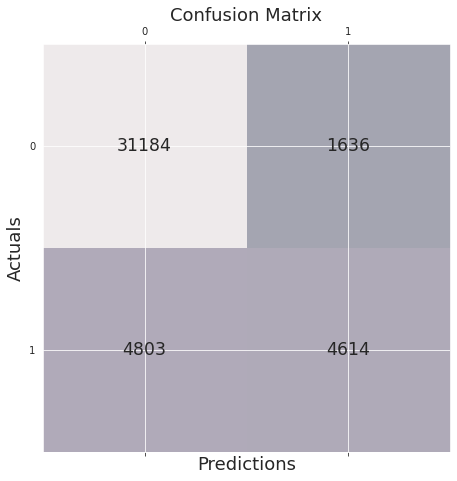

In [63]:
fig,ax = plt.subplots(figsize=(7.5,7.5))
ax.matshow(conf_matrix,alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range(conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i,j], va ='center', ha='center',size='xx-large')
plt.xlabel('Predictions',fontsize=18)
plt.ylabel('Actuals',fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [65]:
print(conf_matrix)
print("Accuracy:",accuracy_score(y_test,t1))
print("Precision:",precision_score(y_test,t1))
print("Recall:",recall_score(y_test,t1))
print("F1-score:",f1_score(y_test,t1))

[[31184  1636]
 [ 4803  4614]]
Accuracy: 0.8475507256670691
Precision: 0.73824
Recall: 0.48996495699267284
F1-score: 0.5890087444947979


# 3.ROC AUC SCORE

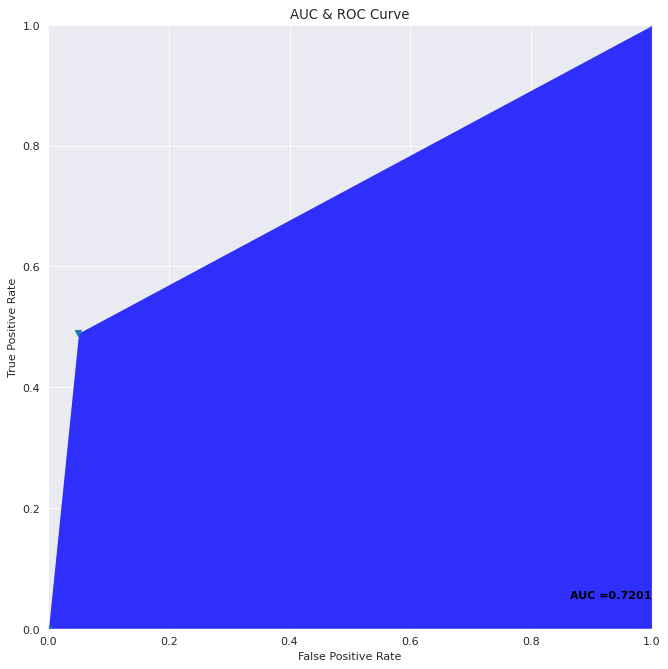

In [66]:
auc = metrics.roc_auc_score(y_test,t1)

fpr,tpr,thresholds = metrics.roc_curve(y_test,t1)

plt.figure(figsize = (12,10),dpi=80)
plt.axis('scaled')
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("AUC & ROC Curve")
plt.plot(fpr,tpr,'v')
plt.fill_between(fpr,tpr,facecolor = 'blue',alpha=0.8)
plt.text(1,0.05, 'AUC =%0.4f' % auc, ha='right', fontsize =10, weight ='bold' , color = 'black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [67]:
!pip install ibm_watson_machine_learning

In [68]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey" : "PQBr9MBF7mFuSh2VVLfOE-liIA04VH-h5VEk8EfjFIuw"
}

client = APIClient(wml_credentials)

In [69]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [71]:
space_uid = guid_from_space_name(client,'models')
print("Space UID = " + space_uid)

Space UID = 48a743e2-399c-4c37-93fb-e7412163309b


In [73]:
client.set.default_space(space_uid)

'SUCCESS'

In [96]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [97]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [99]:
model_details = client.repository.store_model(model = rand_mod, meta_props = {
    client.repository.ModelMetaNames.NAME:"rainfall",
    client.repository.ModelMetaNames.TYPE:"scikit-learn_1.0",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID : software_spec_uid
})
model_id = client.repository.get_model_id(model_details)

In [100]:
model_id

'6d4c1451-5f18-4af5-a23f-c74cdf2a36c7'

In [101]:
X_train_scaled[0]

array([5.19157088e-01, 5.39083558e-04, 3.25581395e-01, 1.53846154e-02,
       6.96969697e-01, 6.80000000e-01, 3.20338983e-01, 3.19218241e-01,
       5.19305019e-01, 0.00000000e+00])

In [102]:
rand_mod.predict([[5.19157088e-01, 5.39083558e-04, 3.25581395e-01, 1.53846154e-02,
       6.96969697e-01, 6.80000000e-01, 3.20338983e-01, 3.19218241e-01,
       5.19305019e-01, 0.00000000e+00]])

array([1])